In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## Data Preprocessing and Visualizations

In [2]:
df=pd.read_csv('Zoo.csv')

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


<Axes: >

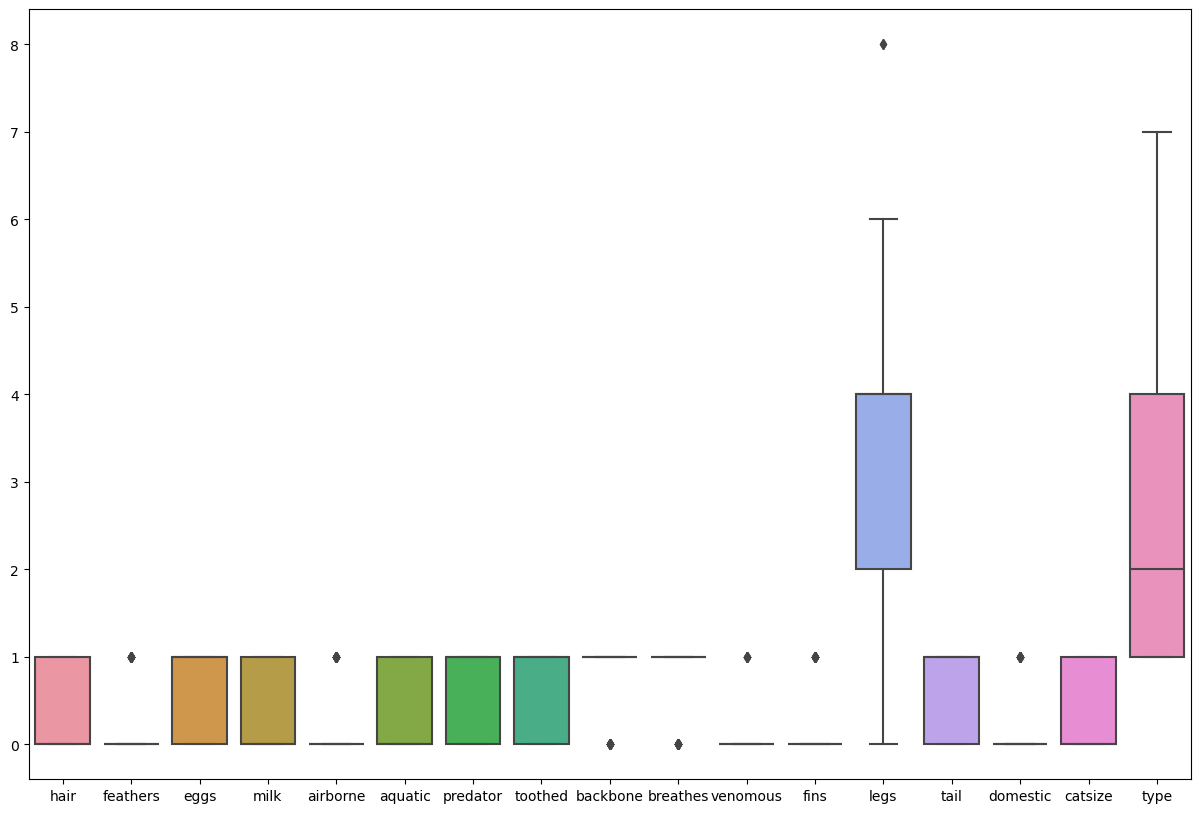

In [5]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

<Axes: >

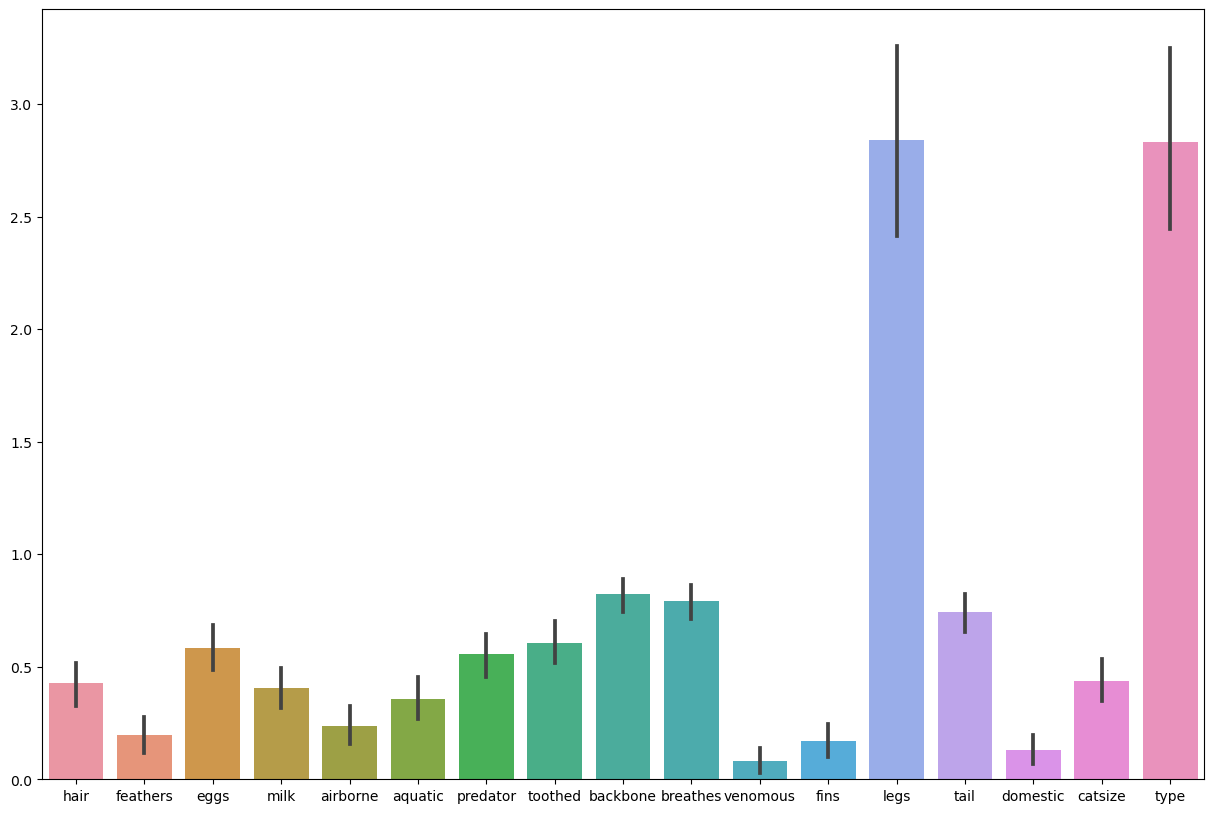

In [6]:
plt.figure(figsize=(15,10))
sns.barplot(df)

In [7]:
df[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']].cov()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
hair,0.246931,-0.085149,-0.201188,0.215446,-0.042178,-0.113267,-0.038416,0.120297,0.036634,0.089406,-0.014059,-0.052376,0.398119,0.010693,0.034653,0.112673
feathers,-0.085149,0.160396,0.083168,-0.081188,0.112475,-0.011287,-0.020891,-0.120792,0.035644,0.041584,-0.015842,-0.033663,-0.168317,0.051485,0.004257,-0.027129
eggs,-0.201188,0.083168,0.245347,-0.229505,0.079802,0.089703,0.002871,-0.156337,-0.064851,-0.077327,0.013267,0.030693,-0.226535,-0.048119,-0.025941,-0.127030
milk,0.215446,-0.081188,-0.229505,0.243564,-0.077426,-0.086139,-0.007327,0.152376,0.073069,0.085248,-0.032475,-0.029010,0.214950,0.045545,0.027228,0.141386
airborne,-0.042178,0.112475,0.079802,-0.077426,0.182970,-0.035545,-0.063069,-0.124950,-0.017228,0.049901,0.000990,-0.040396,0.038020,0.001782,0.009109,-0.074554
aquatic,-0.113267,-0.011287,0.089703,-0.086139,-0.035545,0.231683,0.090396,0.012574,0.004158,-0.125149,0.011485,0.109406,-0.352970,-0.007327,-0.036337,-0.026832
predator,-0.038416,-0.020891,0.002871,-0.007327,-0.063069,0.090396,0.249505,0.031782,0.009802,-0.053564,0.015644,0.035743,-0.101287,0.004158,-0.052079,0.036040
toothed,0.120297,-0.120792,-0.156337,0.152376,-0.124950,0.012574,0.031782,0.241584,0.108713,-0.013168,-0.008317,0.067327,-0.193366,0.067030,0.011485,0.084257
backbone,0.036634,0.035644,-0.064851,0.073069,-0.017228,0.004158,0.009802,0.108713,0.147921,0.032574,-0.025743,0.030297,-0.338515,0.123663,0.013168,0.068416
breathes,0.089406,0.041584,-0.077327,0.085248,0.049901,-0.125149,-0.053564,-0.013168,0.032574,0.166337,-0.013366,-0.094653,0.306733,0.015941,0.017030,0.041485


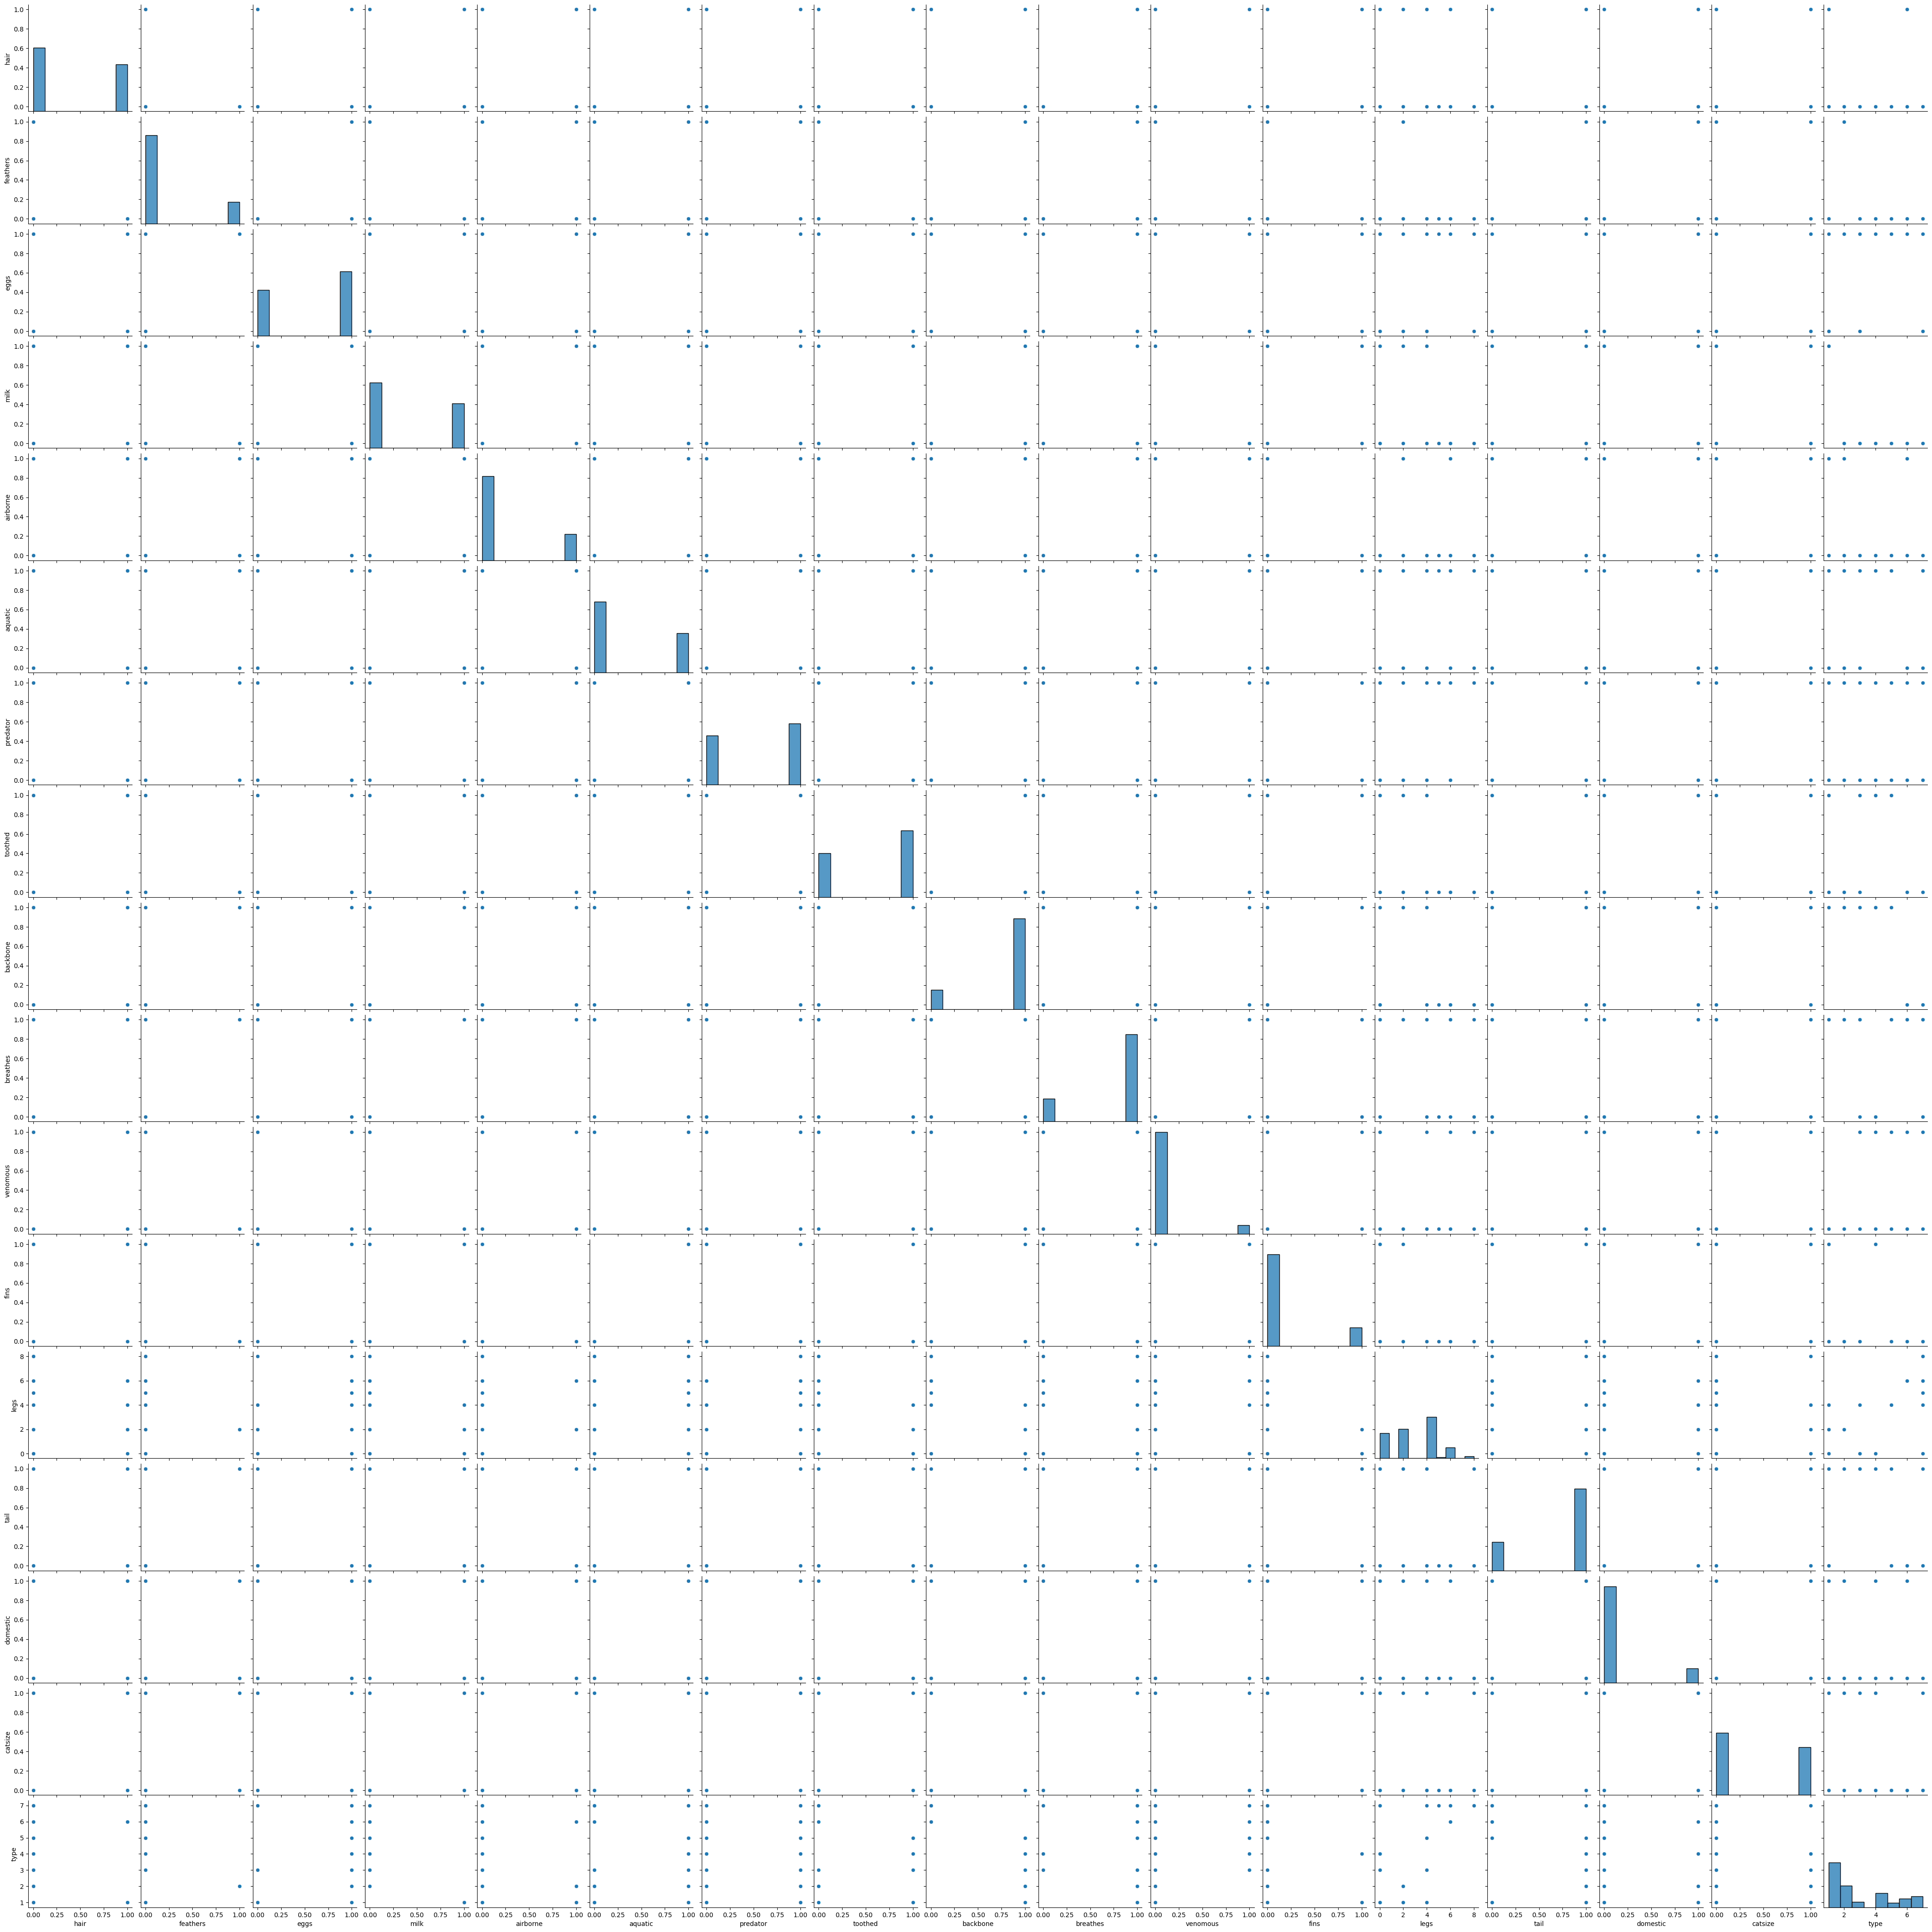

In [8]:
sns.pairplot(df)

In [9]:
df.drop('animal name',axis=1,inplace=True)

In [10]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
Target=df['type']

In [12]:
Features=df.drop('type',axis=1)

In [13]:
Target

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [14]:
Features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


## Creating & Training The Model

In [15]:
x_train,x_test,y_train,y_test=train_test_split(Features,Target,train_size=0.75,random_state=50)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 16)
(26, 16)
(75,)
(26,)


In [32]:
# Find the minimum class count in the training set
_, class_counts = np.unique(y_train, return_counts=True)
min_class_count = min(class_counts)

In [33]:
# Define the parameter grid
params = {
    'n_neighbors': [1, 2, 3, 4, 5],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [34]:
# Initialize the KNN model
knn = KNeighborsClassifier()

In [35]:
# Set up GridSearchCV with StratifiedKFold
n_splits = min(5, min_class_count)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid=params, cv=skf, scoring='accuracy')

In [36]:
# Fit the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [37]:
# Output the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best score: 0.9333333333333332


In [38]:
# Train the best KNN model
best_knn = grid_search.best_estimator_
best_knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [39]:
# Make predictions
y_pred = best_knn.predict(x_test)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [41]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [42]:
# Detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



## Visualizing Decision Boundary

In [70]:
# Defining features and target again
X = df.drop('type', axis=1)  # Assuming 'animal_type' is the target column
y = df['type']

In [55]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

In [56]:
# Create ColumnTransformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [59]:
# Apply preprocessing to the features
X_encoded = preprocessor.fit_transform(X)

In [61]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [62]:
# Select the first two features for visualization
X_vis = X_encoded[:, :2]
y_vis = y_encoded

In [63]:
# Split the data again for visualization purposes
x_train_vis, x_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

In [65]:
# Train the best KNN model on the selected features
best_knn_vis = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric=grid_search.best_params_['metric'])
best_knn_vis.fit(x_train_vis, y_train_vis)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [66]:
# Create a mesh grid for plotting decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = x_train_vis[:, 0].min() - 1, x_train_vis[:, 0].max() + 1
y_min, y_max = x_train_vis[:, 1].min() - 1, x_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [67]:
# Predict class for each point in the mesh grid
Z = best_knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

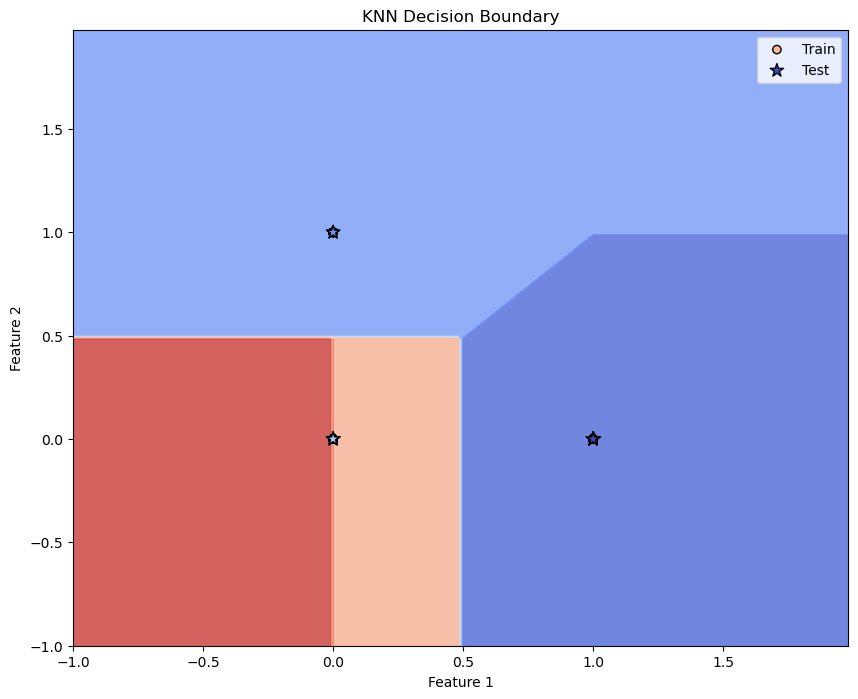

In [69]:
# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(x_train_vis[:, 0], x_train_vis[:, 1], c=y_train_vis, edgecolor='k', cmap=plt.cm.coolwarm, label='Train')
plt.scatter(x_test_vis[:, 0], x_test_vis[:, 1], c=y_test_vis, edgecolor='k', cmap=plt.cm.coolwarm, marker='*', s=100, label='Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.legend()
plt.show()